## This notebook will show the initial finidings of time-series analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/chris/Documents/Senior_Project/CT_SeniorProject/CrashData_Repo1/data/interim/filtered_dataset.csv")


In [2]:
# print head of df
print(df.head())

                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  351626f25a540a0fccbe42fb815b14ae6c75c15676bf7c...              NaN   
1  f798e1cdba8adfb80ee2aaeea541a55dd32fa8aff38494...                Y   
2  0ad333cd371ec3976f9fac8160ccfc91f0399b48a92b7f...              NaN   
3  dfb3229940c672426c4010d7348d16b69b030191213b86...                Y   
4  821ee3270b2c503fd0905415f674d3f4a63e1ac15d9100...              NaN   

   CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  2018-01-01                  30            NO CONTROLS   
1  2018-01-01                  20            NO CONTROLS   
2  2018-01-01                  25            NO CONTROLS   
3  2018-01-01                  30            NO CONTROLS   
4  2018-01-01                  35            NO CONTROLS   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0           NO CONTROLS             CLEAR                 UNKNOWN   
1           NO CONTROLS             CLEAR                DAYLI

In [3]:
# Check for missing data: Look at difference in time between records and plot d/t

# Create new df to look at time differences (and only including certain columns)
columns_to_keep = [ # selected columns to keep for analysis
    "CRASH_DATETIME", "CRASH_DATE", "CRASH_TIME", "CRASH_DAY_OF_WEEK", "Day_Of_Year",
    "Hour_Of_Day", "Hour_Of_Week", "LATITUDE", "LONGITUDE",
    "WEATHER_CONDITION", "LIGHTING_CONDITION"
]
# Create a new DataFrame with selected columns
df_time_diff = df[columns_to_keep].copy()

# Compute the time difference (Δt) between consecutive crashes in minutes
df_time_diff['CRASH_DATETIME'] = pd.to_datetime(df_time_diff['CRASH_DATETIME'])
df_time_diff['Time_Difference'] = df_time_diff['CRASH_DATETIME'].diff().dt.total_seconds() / 60  # Convert to minutes

# Drop the first row since the first time difference is NaN
df_time_diff = df_time_diff.dropna()

# Reset index for clarity
df_time_diff = df_time_diff.reset_index(drop=True)

# print the first few rows of the new DataFrame
print(df_time_diff.head())

       CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  Day_Of_Year  \
0 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
1 2018-01-01 00:00:00  2018-01-01   00:00:00                  1            1   
2 2018-01-01 00:05:00  2018-01-01   00:05:00                  1            1   
3 2018-01-01 00:07:00  2018-01-01   00:07:00                  1            1   
4 2018-01-01 00:20:00  2018-01-01   00:20:00                  1            1   

   Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE WEATHER_CONDITION  \
0            0             0  41.800575 -87.589225             CLEAR   
1            0             0  41.681735 -87.641014           UNKNOWN   
2            0             0  41.949417 -87.668774             CLEAR   
3            0             0  41.683946 -87.622993              SNOW   
4            0             0  41.985479 -87.659979              SNOW   

       LIGHTING_CONDITION  Time_Difference  
0                DAYLIGHT              0.

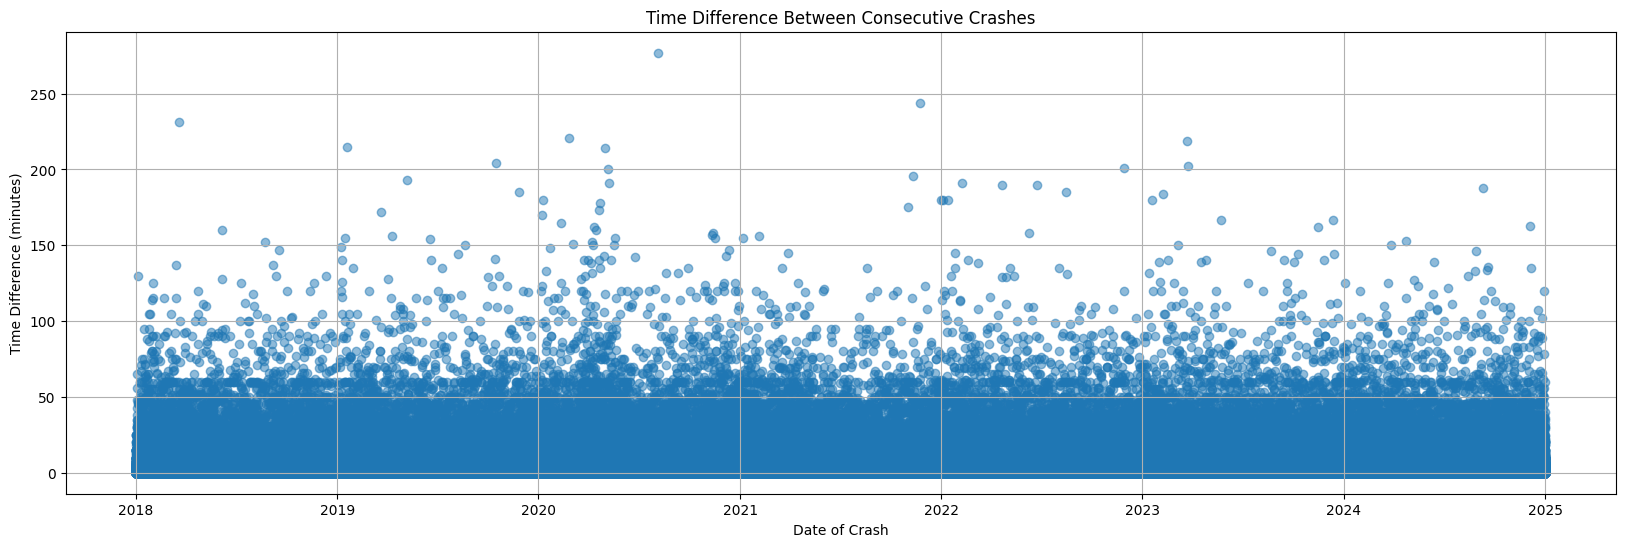

In [4]:
# plot the time differences as a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(df_time_diff['CRASH_DATETIME'], df_time_diff['Time_Difference'], alpha=0.5)
plt.title('Time Difference Between Consecutive Crashes')
plt.xlabel('Date of Crash')
plt.ylabel('Time Difference (minutes)')
plt.grid()


We can't see gaps of data in the scatterplot because there's too many data points. We need to query the dataframe directly.

In [5]:
# Return top 50 maximum time differences
print(df_time_diff['Time_Difference'].nlargest(50)) #in minutes


287935    277.0
424268    244.0
24037     231.0
251132    221.0
564161    219.0
123246    215.0
263872    214.0
211318    204.0
564710    202.0
532823    201.0
264935    200.0
420593    196.0
157571    193.0
265103    191.0
444921    191.0
464600    190.0
484548    190.0
728558    188.0
224531    185.0
500424    185.0
551930    184.0
237619    180.0
434522    180.0
435476    180.0
437667    180.0
546227    180.0
262232    178.0
417920    175.0
261954    173.0
142385    172.0
237078    170.0
583514    167.0
646320    167.0
246490    165.0
754845    163.0
260822    162.0
638455    162.0
49347     160.0
261196    160.0
315584    158.0
479901    158.0
314875    157.0
148645    156.0
334675    156.0
122384    155.0
267287    155.0
316532    155.0
327887    155.0
171812    154.0
683537    153.0
Name: Time_Difference, dtype: float64


The maximum time between any crash is only a couple of hours. There are no large gaps in the data.

In [6]:
# Check for errors in data: are there 0s?
print(df_time_diff[df_time_diff['Time_Difference'] == 0])

            CRASH_DATETIME  CRASH_DATE CRASH_TIME  CRASH_DAY_OF_WEEK  \
0      2018-01-01 00:00:00  2018-01-01   00:00:00                  1   
1      2018-01-01 00:00:00  2018-01-01   00:00:00                  1   
12     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
13     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
14     2018-01-01 01:00:00  2018-01-01   01:00:00                  1   
...                    ...         ...        ...                ...   
762707 2024-12-31 22:50:00  2024-12-31   22:50:00                  2   
762710 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762711 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762712 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   
762713 2024-12-31 23:00:00  2024-12-31   23:00:00                  2   

        Day_Of_Year  Hour_Of_Day  Hour_Of_Week   LATITUDE  LONGITUDE  \
0                 1            0             0  41.800575 -87.5

Let's begin a time-series analysis on this data.

In [7]:
# Ensure CRASH_DATE is in datetime format (if not already)
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Aggregate total crashes per day
df_crashes_per_day = df.groupby("CRASH_DATE").size().reset_index(name="Total_Crashes")

# Display the first few rows
print(df_crashes_per_day.head())

  CRASH_DATE  Total_Crashes
0 2018-01-01            337
1 2018-01-02            452
2 2018-01-03            383
3 2018-01-04            360
4 2018-01-05            373


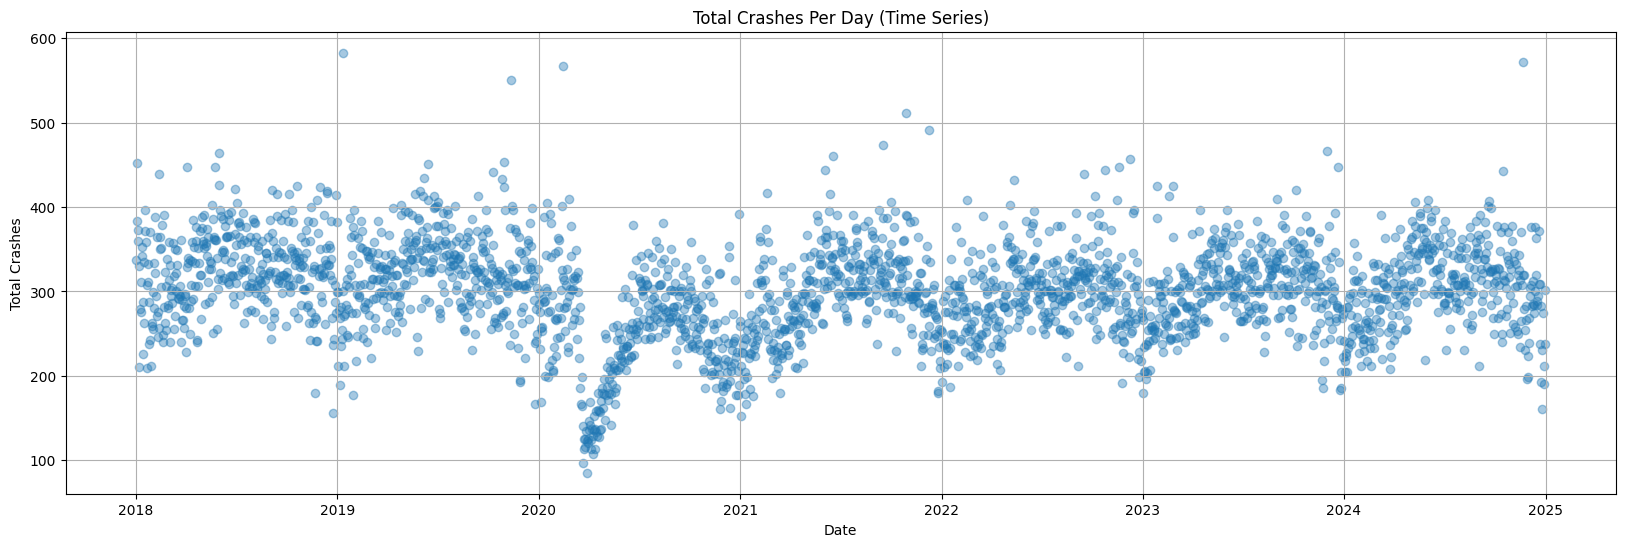

In [8]:
# Plot total crashes per day
plt.figure(figsize=(20, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4)
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Total Crashes Per Day (Time Series)")
plt.grid(True)
plt.show()

Wow! There is a lot of noise, but there appears to be an upside-down U pattern that happens on a yearly basis. 
We can also see the huge dip in crashes that happened at the beginning of 2020. Could be sinusoidal? 

In [9]:
# Check minimum crash counts per day
print(df_crashes_per_day["Total_Crashes"].min())


85


In [10]:
print(df_crashes_per_day.head())

  CRASH_DATE  Total_Crashes
0 2018-01-01            337
1 2018-01-02            452
2 2018-01-03            383
3 2018-01-04            360
4 2018-01-05            373


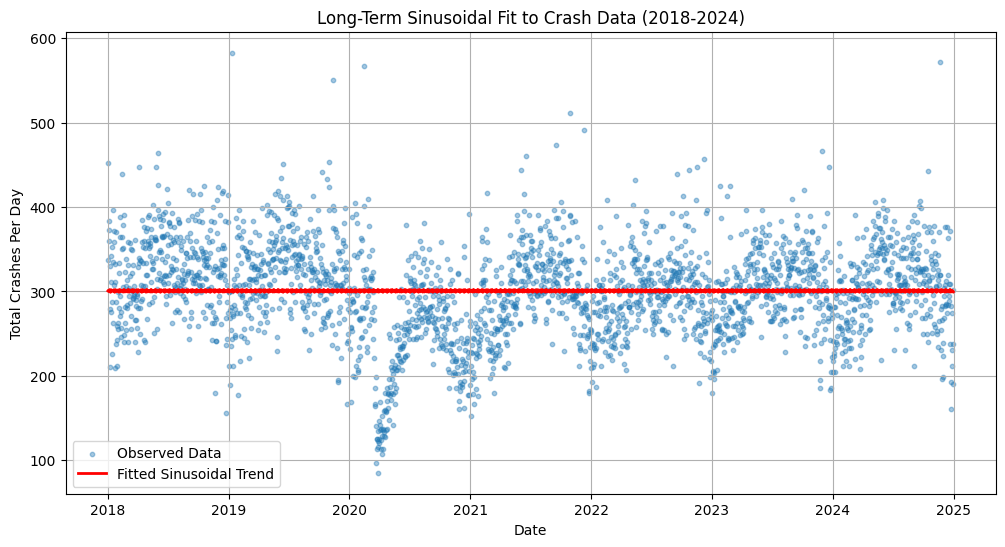

In [21]:
import numpy as np
from scipy.optimize import curve_fit

# Convert CRASH_DATE to a numerical format (days since start of dataset)
df_crashes_per_day["Days_Since_Start"] = (df_crashes_per_day["CRASH_DATE"] - df_crashes_per_day["CRASH_DATE"].min()).dt.days

# Define a sinusoidal function with a long-term period
def long_term_sinusoid(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

# Fit the function to the data
params, _ = curve_fit(long_term_sinusoid, df_crashes_per_day["Days_Since_Start"], df_crashes_per_day["Total_Crashes"])

# Generate predictions
x_values = np.linspace(0, df_crashes_per_day["Days_Since_Start"].max(), 1000)  # Smooth curve
y_pred = long_term_sinusoid(x_values, *params)

# Plot the observed data and fitted sinusoidal trend
plt.figure(figsize=(12, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4, s=10, label="Observed Data")
plt.plot(df_crashes_per_day["CRASH_DATE"].min() + pd.to_timedelta(x_values, unit='D'), y_pred, color="red", linewidth=2, label="Fitted Sinusoidal Trend")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Long-Term Sinusoidal Fit to Crash Data (2018-2024)")
plt.legend()
plt.grid(True)
plt.show()


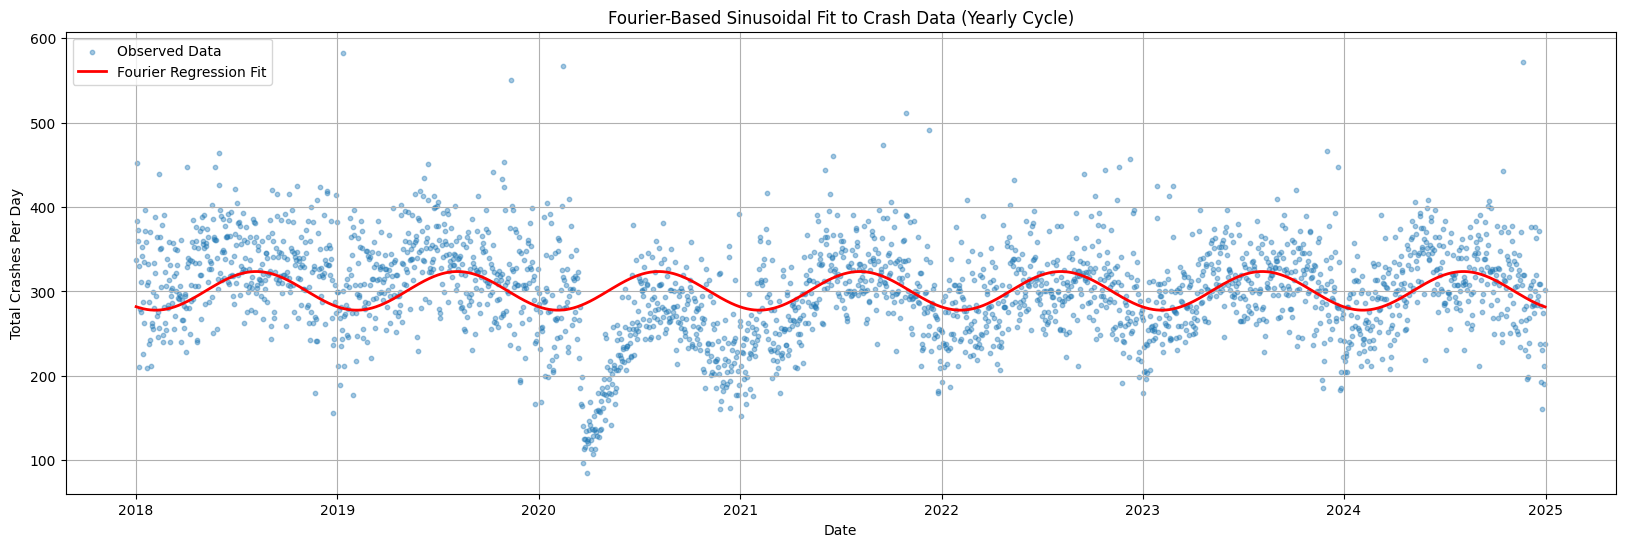

In [12]:
from sklearn.linear_model import LinearRegression

# Convert date to number of days since the start
df_crashes_per_day["Days_Since_Start"] = (df_crashes_per_day["CRASH_DATE"] - df_crashes_per_day["CRASH_DATE"].min()).dt.days

# faurier regression equations: A + Bsin(2πt/P) + Ccos(2πt/P)
# A, B, and C are coefficients
# t is the time variable (days since start)
# P is the period of the cycle (365 days for yearly cycle)


# Define the cycle period (365 days for yearly)
P = 365

# Create sine and cosine terms
df_crashes_per_day["Sin_Term"] = np.sin(2 * np.pi * df_crashes_per_day["Days_Since_Start"] / P)
df_crashes_per_day["Cos_Term"] = np.cos(2 * np.pi * df_crashes_per_day["Days_Since_Start"] / P)

# Define X (independent variables) and Y (dependent variable)
X = df_crashes_per_day[["Sin_Term", "Cos_Term"]]  # Features (sin & cos terms)
y = df_crashes_per_day["Total_Crashes"]  # Target variable

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, y)

# Get coefficients
A = reg.intercept_
B, C = reg.coef_

# Generate predictions
df_crashes_per_day["Fourier_Prediction"] = A + B * df_crashes_per_day["Sin_Term"] + C * df_crashes_per_day["Cos_Term"]

# Plot the results
plt.figure(figsize=(20, 6))
plt.scatter(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Total_Crashes"], alpha=0.4, s=10, label="Observed Data")
plt.plot(df_crashes_per_day["CRASH_DATE"], df_crashes_per_day["Fourier_Prediction"], color="red", linewidth=2, label="Fourier Regression Fit")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Fourier-Based Sinusoidal Fit to Crash Data (Yearly Cycle)")
plt.legend()
plt.grid(True)
plt.show()


What does this graph show us? What can we learn from this?

Helps to predict crash rates based o ntime of year. Looking at monthly cycles and not weekly cycles. (Just looking at each day and not a Sunday in January)

Trying to set up prophet

In [13]:
# in terminal run: pip install prophet
#from fbprophet import Prophet

df_prophet = df_crashes_per_day.rename(columns={"CRASH_DATE": "ds", "Total_Crashes": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]) # date formatting
print(df_prophet.head())

          ds    y  Days_Since_Start  Sin_Term  Cos_Term  Fourier_Prediction
0 2018-01-01  337                 0  0.000000  1.000000          281.828518
1 2018-01-02  452                 1  0.017213  0.999852          281.606744
2 2018-01-03  383                 2  0.034422  0.999407          281.390614
3 2018-01-04  360                 3  0.051620  0.998667          281.180192
4 2018-01-05  373                 4  0.068802  0.997630          280.975541


In [14]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Fit the model
model.fit(df_prophet)

# Create future dates for the next 365 days
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Display forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

Importing plotly failed. Interactive plots will not work.
22:51:34 - cmdstanpy - INFO - Chain [1] start processing
22:51:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,271.815019,220.325411,325.231818
1,2018-01-02,280.429710,227.971323,334.658573
2,2018-01-03,277.977719,224.904106,335.124824
3,2018-01-04,283.967588,231.399527,337.348101
4,2018-01-05,321.424156,262.767511,374.614429


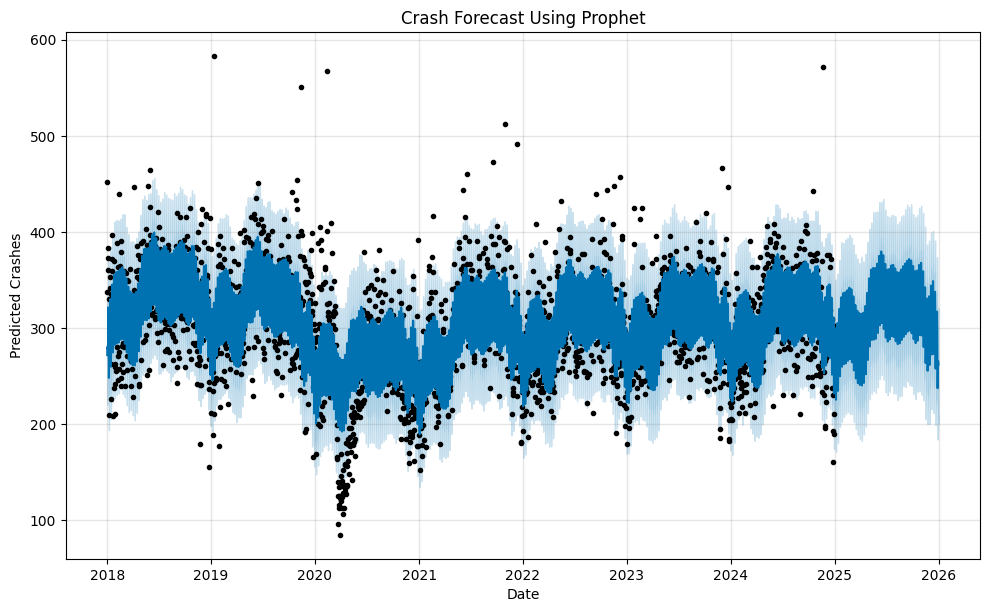

In [15]:
# Plot forecast
model.plot(forecast)
plt.title("Crash Forecast Using Prophet")
plt.xlabel("Date")
plt.ylabel("Predicted Crashes")
plt.grid(True)
plt.show()


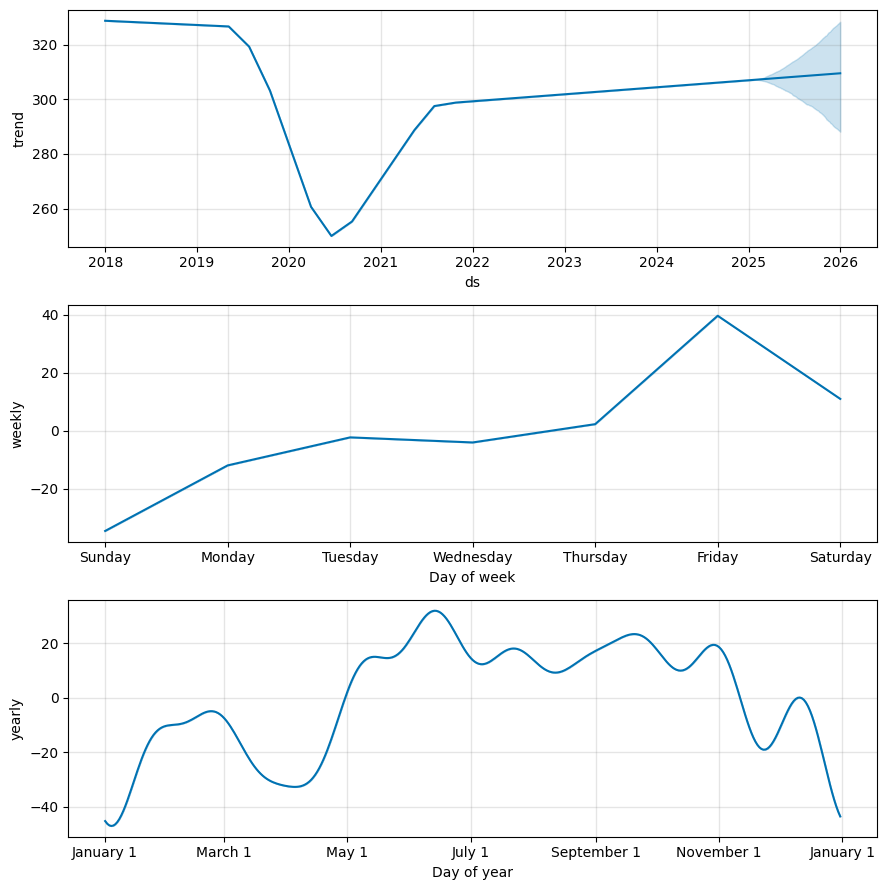

In [16]:
model.plot_components(forecast)
plt.show()


Let's compute the residuals on the main graph above. 
* The model is taking account of weekly/yearly cycles so we should see if there's any patterns left. (There might be some autocorrelation)


In [17]:
print(df_prophet.head())
print(forecast.head())

          ds    y  Days_Since_Start  Sin_Term  Cos_Term  Fourier_Prediction
0 2018-01-01  337                 0  0.000000  1.000000          281.828518
1 2018-01-02  452                 1  0.017213  0.999852          281.606744
2 2018-01-03  383                 2  0.034422  0.999407          281.390614
3 2018-01-04  360                 3  0.051620  0.998667          281.180192
4 2018-01-05  373                 4  0.068802  0.997630          280.975541
          ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2018-01-01  328.762445  220.325411  325.231818   328.762445   328.762445   
1 2018-01-02  328.758203  227.971323  334.658573   328.758203   328.758203   
2 2018-01-03  328.753962  224.904106  335.124824   328.753962   328.753962   
3 2018-01-04  328.749720  231.399527  337.348101   328.749720   328.749720   
4 2018-01-05  328.745478  262.767511  374.614429   328.745478   328.745478   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \

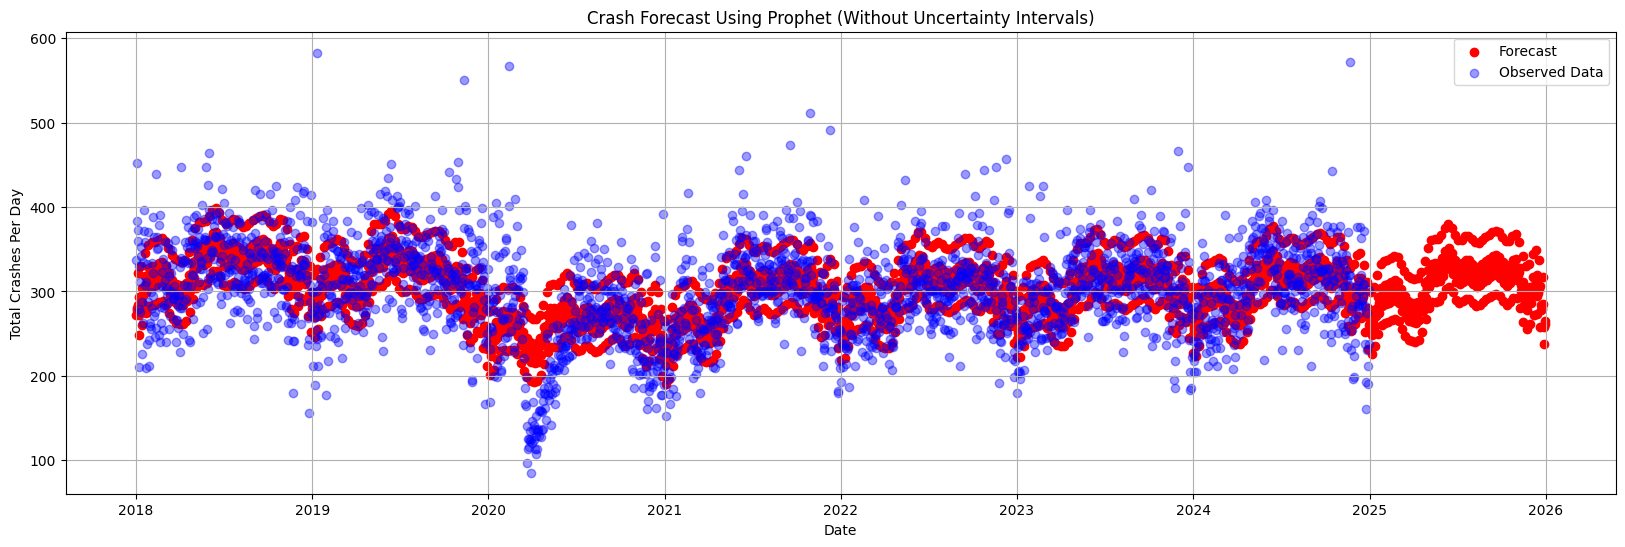

In [18]:
# Plot forecast (without the upper and lower bounds)
plt.figure(figsize=(20, 6))
plt.scatter(forecast["ds"], forecast["yhat"], color="red", label="Forecast")
plt.scatter(df_prophet["ds"], df_prophet["y"], alpha=0.4, color="blue", label="Observed Data")
plt.xlabel("Date")
plt.ylabel("Total Crashes Per Day")
plt.title("Crash Forecast Using Prophet"
" (Without Uncertainty Intervals)")
plt.legend()
plt.grid(True)
plt.show()


This graph shows us the predicted vs actual crash rate values. We can see in the prediction for 2026 that there are 3 different "layers" of the forcast. 

Let's look at the residuals of this graph.

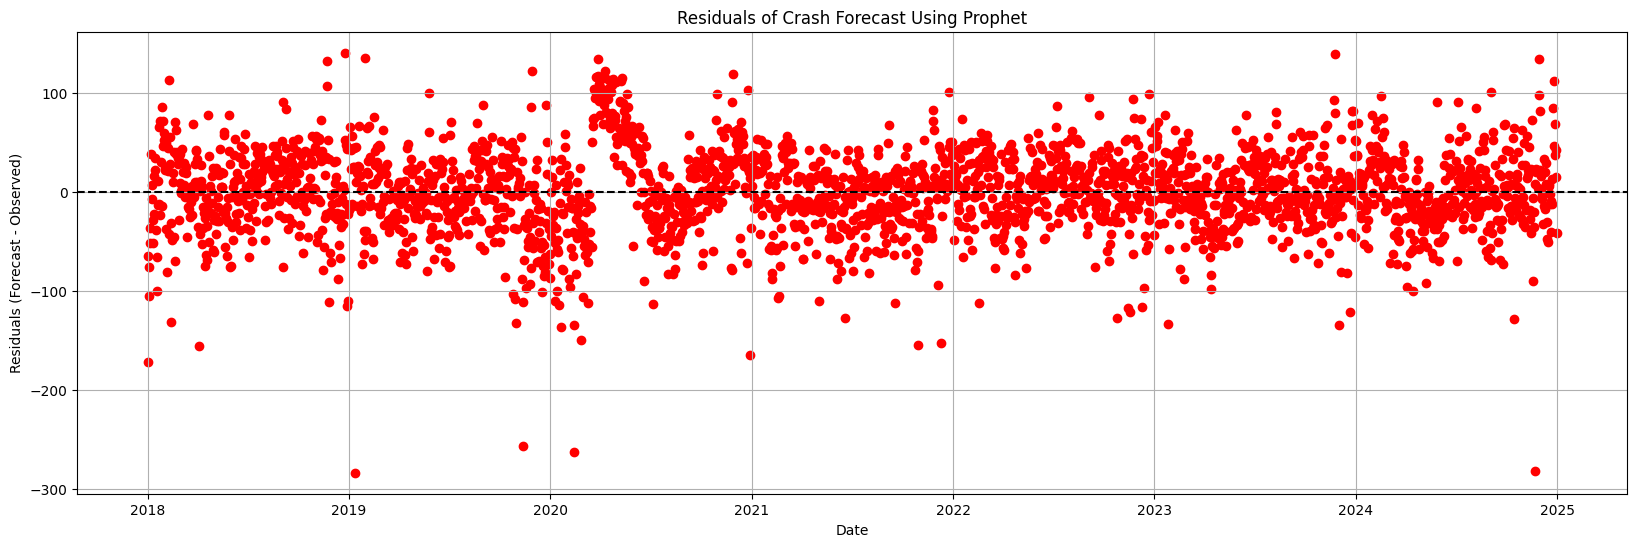

In [19]:
# Plot residuals (forecast - observed)
plt.figure(figsize=(20, 6))
plt.scatter(forecast["ds"], forecast["yhat"] - df_prophet["y"], color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Residuals (Forecast - Observed)")
plt.title("Residuals of Crash Forecast Using Prophet")
plt.grid(True)
plt.show()


There doesn't appear to be any noticible trends in the residuals graph. This shows that the weekly and yearly cycles account for the patterns in the data. 

We can see during 2020 there is some kind of pattern in the residuals. It seems that early in the year the forecast overpredicts the amount of crashes, and then midway through the year, the model underpredicts the amount of crashes. 

There also seem to be some extreme values where the prediction was way off (Jan 2019, Nov 2019, Feb 2020, Nov 2024). What is the significance of these days?

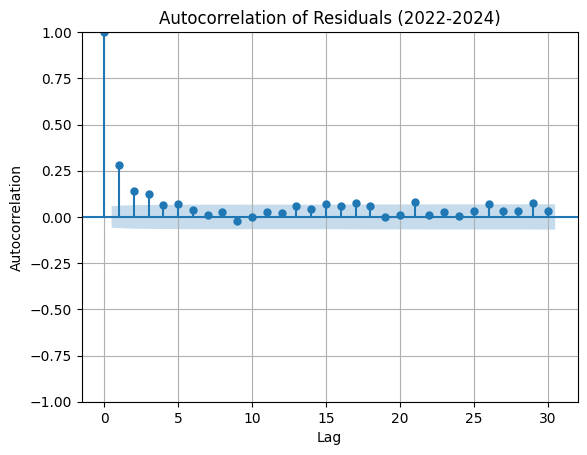

In [20]:
# Run autocorrelation plot on residuals from 2022-2024

# pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Extract residuals from 2022-2024
residuals = forecast[forecast["ds"].dt.year.isin([2022, 2023, 2024])]["yhat"] - df_prophet["y"]
residuals = residuals.dropna()

# Plot autocorrelation
plot_acf(residuals, lags=30)
plt.title("Autocorrelation of Residuals (2022-2024)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()



What does this mean? 
Is this how this should look?

Let's fit an ARIMAX model on the residuals from the prophet forecast

In [22]:
# Fit an ARIMAX model to the residuals
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAXResults
from statsmodels.tsa.arima.model import ARIMAResults


# Define the ARIMAX model
model = SARIMAX(residuals, order=(1, 0, 1), seasonal_order=(1, 0, 1, 7))

# Fit the model
model_fit = model.fit()

# Display model summary
print(model_fit.summary())


c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1096
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -5474.222
Date:                           Wed, 12 Mar 2025   AIC                          10958.444
Time:                                   23:19:45   BIC                          10983.442
Sample:                                        0   HQIC                         10967.903
                                          - 1096                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6090      0.082      7.466      0.000       0.449       0.769
ma.L1         -0.3643      0.093     -3.900

Need to interpret these results. Should I incorporate the parameter seasonal_order? Or should I remove that?

Let's take a look at Holt-Winters Smoothing

# What is Holt-Winters Smoothing?
Holt-Winters is a forecasting technique that smooths a time series using three components:

Level (α - Alpha): The base value of the series.
Trend (β - Beta): The long-term increase or decrease.
Seasonality (γ - Gamma): The repeating pattern (e.g., weekly cycle in crash data).

# Why Use Holt-Winters?

Better at handling seasonality than ARIMA.
Can adapt to changing trends over time.
Works well for short-term forecasts (e.g., weekly patterns).

c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


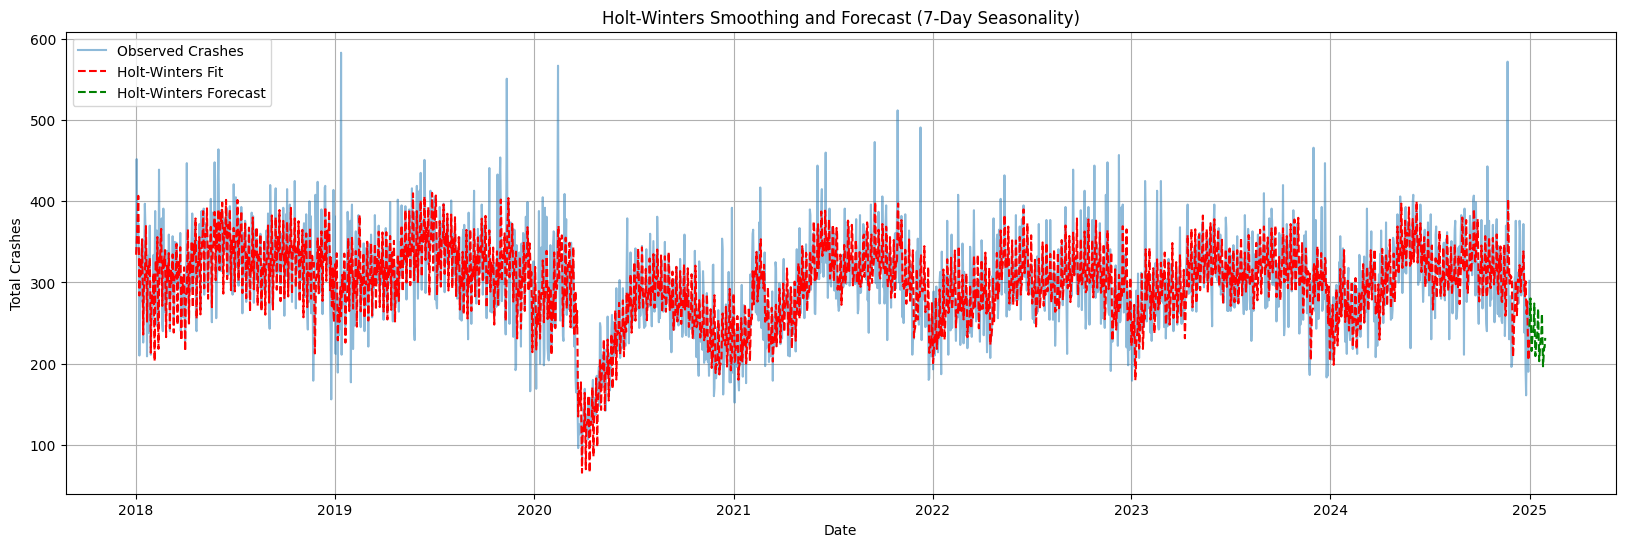

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ensure CRASH_DATE is a datetime index
df_daily = df_crashes_per_day.set_index("CRASH_DATE")

# Apply Holt-Winters smoothing with a 7-day seasonality
model = ExponentialSmoothing(df_daily["Total_Crashes"],
                             trend="add",  # Allows trend changes over time
                             seasonal="add",  # Captures seasonality
                             seasonal_periods=7)  # Weekly cycle
model_fit = model.fit()

# Forecast the next 30 days
df_daily["HoltWinters_Fitted"] = model_fit.fittedvalues
df_forecast = model_fit.forecast(steps=30)

# Plot results
plt.figure(figsize=(20, 6))
plt.plot(df_daily.index, df_daily["Total_Crashes"], label="Observed Crashes", alpha=0.5)
plt.plot(df_daily.index, df_daily["HoltWinters_Fitted"], color="red", linestyle="--", label="Holt-Winters Fit")
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq="D"), df_forecast, color="green", linestyle="--", label="Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Holt-Winters Smoothing and Forecast (7-Day Seasonality)")
plt.legend()
plt.grid(True)
plt.show()


c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\chris\Documents\Senior_Project\CT_SeniorProject\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


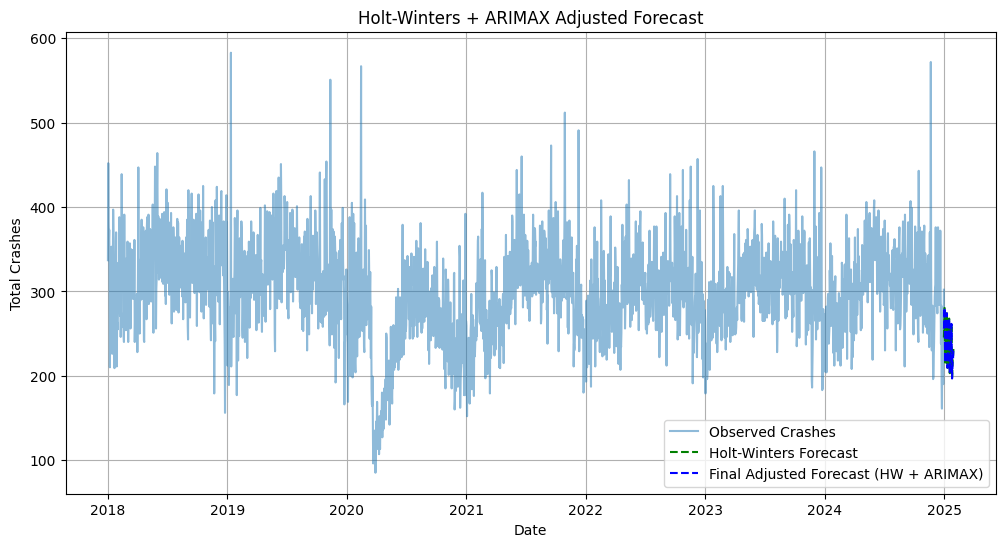

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Calculate residuals (differences between actual and Holt-Winters fit)
df_daily["Residuals"] = df_daily["Total_Crashes"] - df_daily["HoltWinters_Fitted"]

# Fit ARIMAX model on residuals
model_arimax = ARIMA(df_daily["Residuals"], order=(1,1,1))  # If using weather data exog=df_weather_data
model_arimax_fit = model_arimax.fit()

# Forecast residuals
residual_forecast = model_arimax_fit.forecast(steps=30)

# Adjust Holt-Winters forecast with ARIMAX correction
final_forecast = df_forecast + residual_forecast

# Plot adjusted forecast
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily["Total_Crashes"], label="Observed Crashes", alpha=0.5)
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq="D"), df_forecast, color="green", linestyle="--", label="Holt-Winters Forecast")
plt.plot(pd.date_range(df_daily.index[-1], periods=30, freq="D"), final_forecast, color="blue", linestyle="--", label="Final Adjusted Forecast (HW + ARIMAX)")
plt.xlabel("Date")
plt.ylabel("Total Crashes")
plt.title("Holt-Winters + ARIMAX Adjusted Forecast")
plt.legend()
plt.grid(True)
plt.show()
